# Blurring
有時我們收到的影像雜訊過多，這時需要進行平滑化去除雜訊，不過為了去除雜訊，可能造成影像對比度下降，好的品質可能需要大量的處理時間，所以通常根據實際需求，選擇一個適合的手法，常見的有四種平滑方式，分別是平均平滑、高斯平滑、中值濾波、雙邊濾波，OpenCV對於這四種平滑方式皆有支援，只要呼叫即可使用。

In [2]:
import cv2
import numpy as np
from utils import show
import matplotlib.pyplot as plt
def show(img, title=None, figsize=(15, 12)):
    #show img from opencv to jupyter notebook
    plt.figure(figsize=figsize)
    plt.axis('off')
    if title:
        plt.title(title)
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img[:,:,[2,1,0]])

 - # Averaging 平均平滑
## cv2.blur(src, ksize[, dst[, anchor[, borderType]]]) -> dst

平均平滑對鄰域內的像素一視同仁，所以有明顯模糊的副作用

kernel size 越大越模糊

As the name suggests, we are going to define a k  k sliding
window on top of our image, where k is always an odd
number. This window is going to slide from left-to-right
and from top-to-bottom. The pixel at the center of this matrix
(we have to use an odd number, otherwise there would
not be a true “center”) is then set to be the average of all
other pixels surrounding it.

- # Gaussian 高斯平滑

高斯平滑改變核心的參數，將靠近中心的像素權重加大，來讓處理後的模糊現象減小，高斯模板核心參數是由高斯函數計算得來，用核心內各像素結果相加替換當前的像素值，接著用卷積對整張影像作處理。

Gaussian
blurring is similar to average blurring, but instead of
using a simple mean, we are now using a weighted mean,
where neighborhood pixels that are closer to the central
pixel contribute more “weight” to the average.
## GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst

 By setting sigmaX value to 0, we are instructing
OpenCV to automatically compute them based on our
kernel size.

實際使用時，如果標準差σ如果過小，偏離中心的像素權重會非常小，結果像沒有任何處理，標準差σ如果過大，高斯模板將退化成平均模板。實際當模板3×3時，σ為0.8左右，對於更大的模板可以適當的增加σ的值，以下分別為高斯函數和常用的3×3高斯模板。

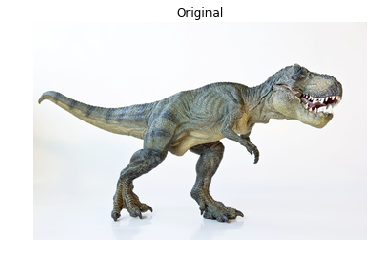

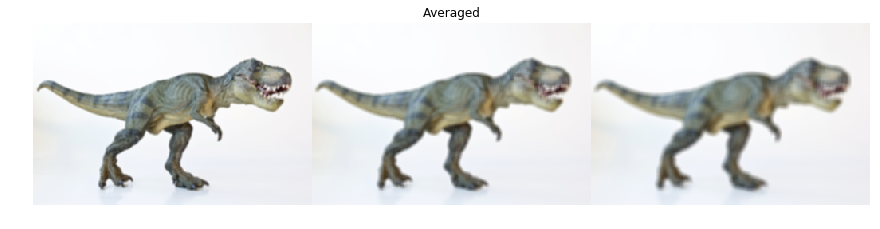

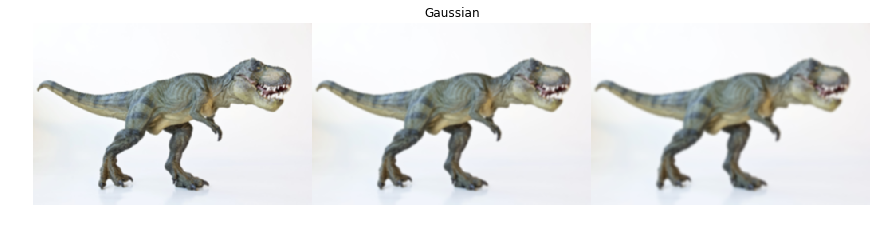

In [4]:
image_dir = "images/trex.png"
image = cv2.imread(image_dir)

blurred = np.hstack([
    cv2.blur(image, (3, 3)),
    cv2.blur(image, (5, 5)),
    cv2.blur(image, (7, 7))
])

show(image, title='Original', figsize=(6,4))
show(blurred, title='Averaged')

blurred = np.hstack([
	cv2.GaussianBlur(image, (3, 3), 0),
	cv2.GaussianBlur(image, (5, 5), 0),
	cv2.GaussianBlur(image, (7, 7), 0)
])
# cv2.imshow("Gaussian", blurred)
show(blurred, 'Gaussian')

# Median 中值濾波
## medianBlur(src, ksize[, dst]) -> dst
##### To reduce noise and detail in an image, but lose edges in the image.
中值濾波作法為統計排序的濾波器，對於影像某個像素，中值濾波會將濾波範圍內的所有像素排序，並用中值替換當前的像素值，在椒鹽噪音這種類型的雜訊，中值濾波能夠有效的去除雜訊，且模糊的現象比平均平滑和高斯平滑都來的輕微。

Notice that we are no longer creating a “motion blur” effect
like in averaging and Gaussian blurring – instead, we are removing detail and noise.


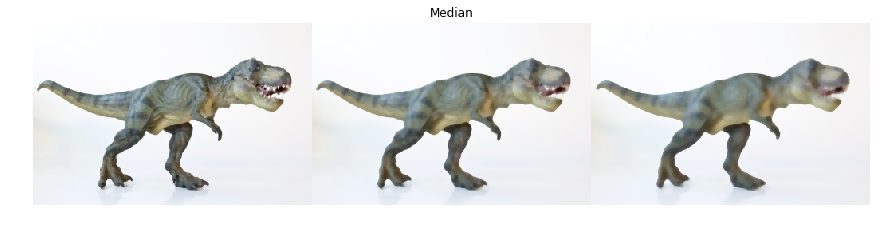

In [8]:
blurred = np.hstack([
	cv2.medianBlur(image, 3),
	cv2.medianBlur(image, 5),
	cv2.medianBlur(image, 7)
])
# cv2.imshow("Median", blurred)
show(blurred, title='Median')
print('''Notice that we are no longer creating a “motion blur” effect
like in averaging and Gaussian blurring – instead, we are removing detail and noise.''')

# Bilateral 雙邊濾波
## bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
##### To reduce noise while still maintaining edges

雙邊濾波器和傳統的平滑化不同，雙邊濾波器除了使用像素之間幾何上的靠近程度之外，還多考慮了像素之間的光度/色彩差異，使得雙邊濾波器能夠有效的將影像上的雜訊去除，同時保存影像上的邊緣資訊，不過需要的處理時間相對較多。

A larger value for **sigmaColor** means that more
colors in the neighborhood will be considered when computing
the blur. Finally, we need to supply the **sigmaSpace**. A
larger value of **sigmaSpace** means that pixels farther out from
the central pixel will influence the blurring calculation, provided
that their colors are similar enough.

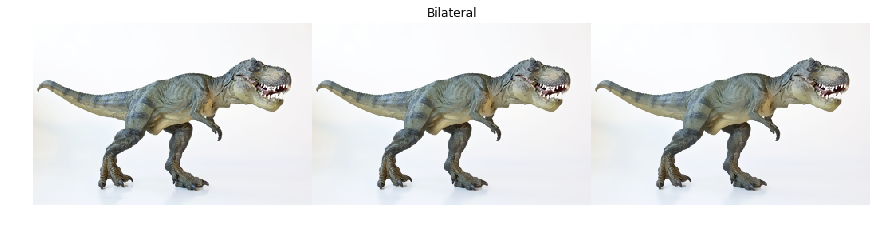

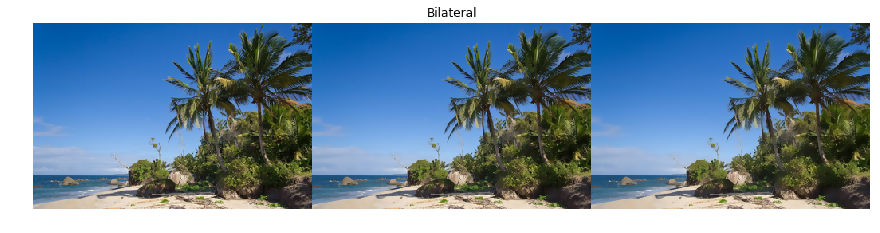

In [10]:
blurred = np.hstack([
	cv2.bilateralFilter(image, 5, 21, 21),
	cv2.bilateralFilter(image, 7, 31, 31),
	cv2.bilateralFilter(image, 9, 41, 41)
])
show(blurred, title='Bilateral')

beach = cv2.imread('images/beach.png')
blurred = np.hstack([
	cv2.bilateralFilter(beach, 5, 21, 21),
	cv2.bilateralFilter(beach, 7, 31, 31),
	cv2.bilateralFilter(beach, 9, 41, 41)
])
show(blurred, title='Bilateral')